In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_dict = np.load('data_Accuracy_order-2_to_10_NQ-4_to_10_Trotter_order-2_l-1_t-1.npy',allow_pickle=True).item()

trotter_error_list_nq = data_dict['trotter_error_list_nq']
st_wave_error_list_nq = data_dict['st_wave_error_list_nq']
r_list_nq = data_dict['r_list_nq']
one_step_gate_count_list_nq = data_dict['one_step_gate_count_list_nq']
der_acc_order_list = data_dict['der_acc_order_list']
NQ_list = data_dict['NQ_list']
set_error = data_dict['set_error']
t = data_dict['l']
l = data_dict['t']
p = data_dict['trotter_order']

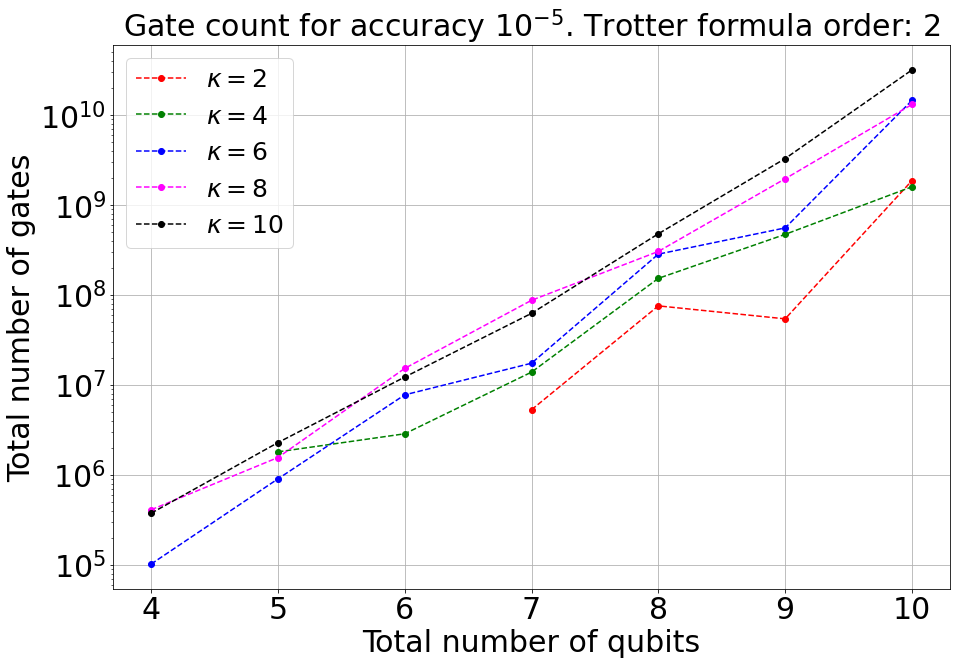

In [3]:
plt.figure(figsize = (15,10))
colour_list = ['r','g','b','magenta','black']

assert len(colour_list) == len(der_acc_order_list)

for params in zip(der_acc_order_list, colour_list,
                  trotter_error_list_nq.T, st_wave_error_list_nq.T,
                  r_list_nq.T, one_step_gate_count_list_nq.T):
    der_acc_order, c, trotter_error_list, st_wave_error_list, r_list, one_step_gate_count_list = params
    
    assertion_list = st_wave_error_list<=set_error
    
    NQ_list_corrected = []
    total_gate_count_list_corrected = []
    for NQ, r, one_step_gate_count, assertion in zip(NQ_list, r_list, one_step_gate_count_list, assertion_list):
        if assertion:
            NQ_list_corrected.append(NQ)
            total_gate_count_list_corrected.append(r*one_step_gate_count)
    
    plt.plot(NQ_list_corrected, total_gate_count_list_corrected, marker='o', c=c,
             linestyle='dashed',label='$\kappa = {}$'.format(der_acc_order))
    
    
    
plt.yscale('log')
# plt.xscale('log')
plt.grid(alpha = 1)
plt.legend(fontsize = 25)
plt.title('Gate count for accuracy $10^{%d}$. Trotter formula order: %d'%(int(np.log10(set_error)),p), fontsize = 30)
plt.xlabel('Total number of qubits', fontsize = 30 )
plt.ylabel('Total number of gates', fontsize = 30 )

plt.tick_params(axis='x', labelsize=30)
plt.tick_params(axis='y', labelsize=30)


figFilename = "total_gate_count_Set_error-10{}_".format(int(np.log10(set_error)))
figFilename += "Accuracy_order-{}_to_{}_NQ-{}_to_{}_Trotter_order-{}.pdf".format(der_acc_order_list[0],
                                                                                 der_acc_order_list[-1],
                                                                                 NQ_list[0],NQ_list[-1],p)
# plt.savefig(figFilename, format="pdf", bbox_inches="tight")

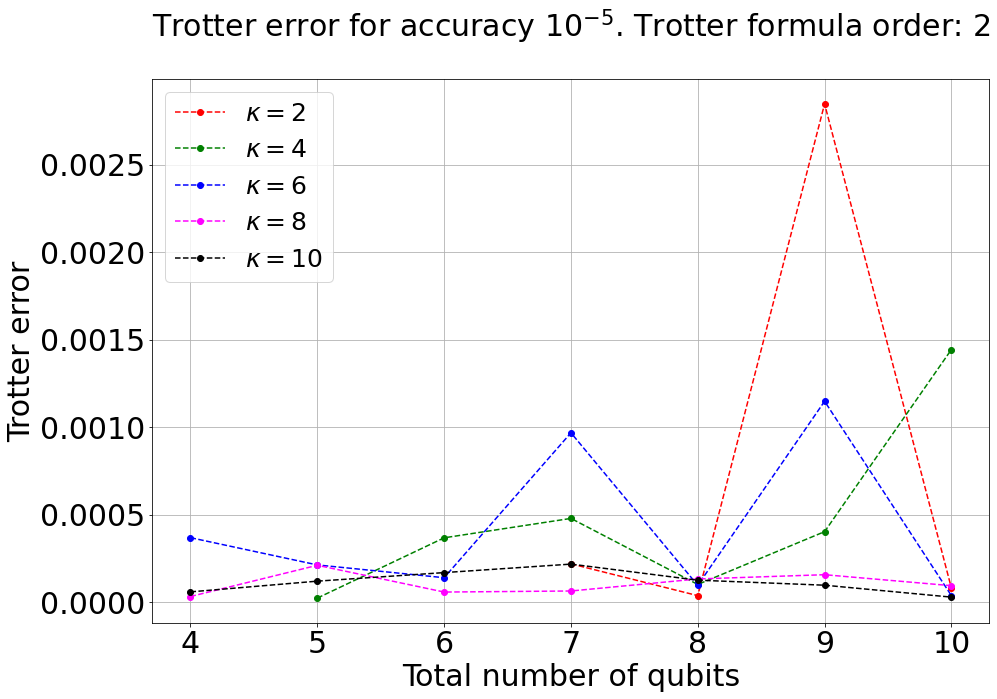

In [4]:
plt.figure(figsize = (15,10))

colour_list = ['r','g','b','magenta','black']

assert len(colour_list) == len(der_acc_order_list)

for params in zip(der_acc_order_list, colour_list,
                  trotter_error_list_nq.T, st_wave_error_list_nq.T,
                  r_list_nq.T, one_step_gate_count_list_nq.T):
    der_acc_order, c, trotter_error_list, st_wave_error_list, r_list, one_step_gate_count_list = params
    
    assertion_list = st_wave_error_list<=set_error
    
    NQ_list_corrected = []
#     total_gate_count_list_corrected = []
    trotter_error_list_corrected = []
    for NQ, trotter_error, assertion in zip(NQ_list, trotter_error_list, assertion_list):
        if assertion:
            NQ_list_corrected.append(NQ)
            trotter_error_list_corrected.append(trotter_error)
    
    plt.plot(NQ_list_corrected, trotter_error_list_corrected, marker='o', c=c,
             linestyle='dashed',label='$\kappa = {}$'.format(der_acc_order))
    
    
    
# plt.yscale('log')
# plt.xscale('log')
plt.grid(alpha = 1)
plt.legend(fontsize = 25)
plt.title('Trotter error for accuracy $10^{%d}$. Trotter formula order: %d\n'%(int(np.log10(set_error)),p), fontsize = 30)
plt.xlabel('Total number of qubits', fontsize = 30 )
plt.ylabel('Trotter error', fontsize = 30 )

plt.tick_params(axis='x', labelsize=30)
plt.tick_params(axis='y', labelsize=30)
ax = plt.gca()
ax.yaxis.offsetText.set_fontsize(25)
# ax.yaxis.set_offset_position('right')

# plt.axes()
figFilename = "trotter_error_Set_error-10{}_".format(int(np.log10(set_error)))
figFilename += "Accuracy_order-{}_to_{}_NQ-{}_to_{}_Trotter_order-{}.pdf".format(der_acc_order_list[0],
                                                                                 der_acc_order_list[-1],
                                                                                 NQ_list[0],NQ_list[-1],p)
# plt.savefig(figFilename, format="pdf", bbox_inches="tight")

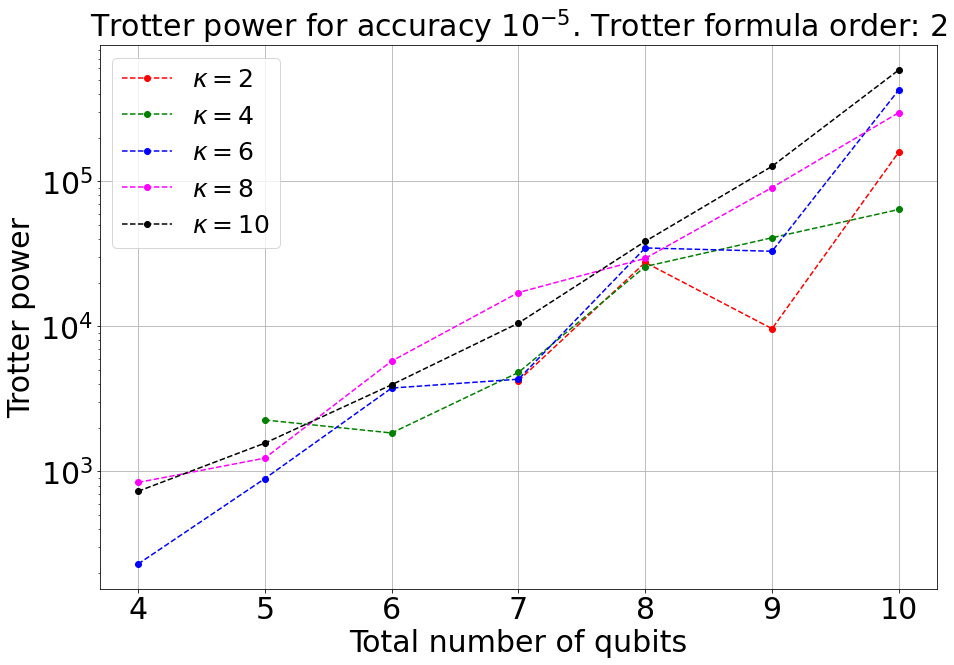

In [5]:
plt.figure(figsize = (15,10))

colour_list = ['r','g','b','magenta','black']

assert len(colour_list) == len(der_acc_order_list)

for params in zip(der_acc_order_list, colour_list,
                  trotter_error_list_nq.T, st_wave_error_list_nq.T,
                  r_list_nq.T, one_step_gate_count_list_nq.T):
    der_acc_order, c, trotter_error_list, st_wave_error_list, r_list, one_step_gate_count_list = params
    
    assertion_list = st_wave_error_list<=set_error  
            
    NQ_list_corrected = []
    r_list_corrected = []
    for NQ, r, assertion in zip(NQ_list, r_list, assertion_list):
        if assertion:
            NQ_list_corrected.append(NQ)
            r_list_corrected.append(r)
    
    plt.plot(NQ_list_corrected, r_list_corrected, marker='o', c=c,
             linestyle='dashed',label='$\kappa = {}$'.format(der_acc_order))
    
    
    
plt.yscale('log')
# plt.xscale('log')
plt.grid(alpha = 1)
plt.legend(fontsize = 25)
plt.title('Trotter power for accuracy $10^{%d}$. Trotter formula order: %d'%(int(np.log10(set_error)),p), fontsize = 30)
plt.xlabel('Total number of qubits', fontsize = 30 )
plt.ylabel('Trotter power', fontsize = 30 )

plt.tick_params(axis='x', labelsize=30)
plt.tick_params(axis='y', labelsize=30)


figFilename = "trotter_power_Set_error-10{}_".format(int(np.log10(set_error)))
figFilename += "Accuracy_order-{}_to_{}_NQ-{}_to_{}_Trotter_order-{}.pdf".format(der_acc_order_list[0],
                                                                                 der_acc_order_list[-1],
                                                                                 NQ_list[0],NQ_list[-1],p)
# plt.savefig(figFilename, format="pdf", bbox_inches="tight")